<a href="https://colab.research.google.com/github/beelittlehoney/Deep-Learning/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [79]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import requests
import json

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [80]:
path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"
response = requests.get(path)
dataset = json.loads(response.content)
df = pd.DataFrame(dataset)

In [81]:
df.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


## 1. Tokenize the data

In [82]:
df = df[df['rating'] != 3]
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [83]:
reviews = df['review'].astype(str).values
labels = df['label'].values

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

## 2. Sequence the data

In [84]:
sequences = tokenizer.texts_to_sequences(reviews)

## 3. Pad the data

In [85]:
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

## 4. Train a sentiment model

In [86]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [87]:
model = Sequential([
  Embedding(input_dim=10000, output_dim=128, input_length=100),
  Bidirectional(SimpleRNN(64, return_sequences=False)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [89]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
  X_train, y_train,
  epochs=10,
  validation_data=(X_test, y_test),
  callbacks=[early_stop]
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.5312 - loss: 0.6943 - val_accuracy: 0.5170 - val_loss: 0.6878
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5694 - loss: 0.6672 - val_accuracy: 0.5739 - val_loss: 0.6714
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7522 - loss: 0.5670 - val_accuracy: 0.6136 - val_loss: 0.6657
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8664 - loss: 0.3906 - val_accuracy: 0.6477 - val_loss: 0.6059
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9126 - loss: 0.2608 - val_accuracy: 0.6648 - val_loss: 0.7070
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9698 - loss: 0.1114 - val_accuracy: 0.6761 - val_loss: 0.7424


## Get files for visualing the network

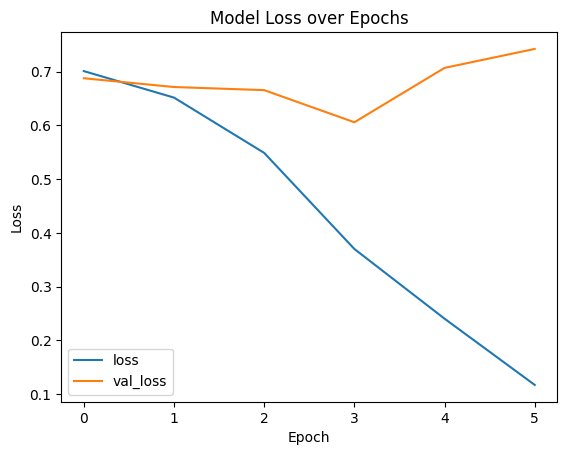

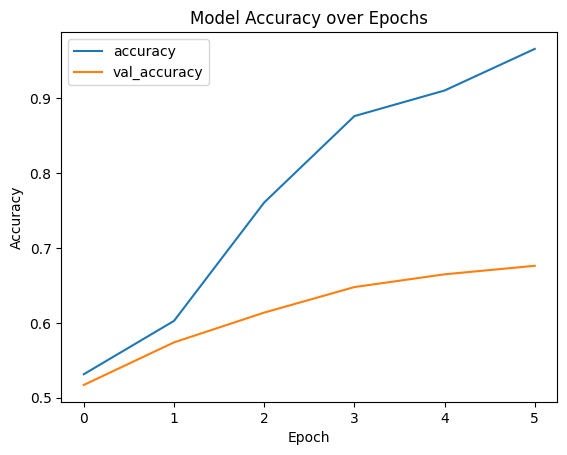

In [90]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 5. Predict sentiment with new reviews

In [111]:
def predict_sentiment(text):
  sequence = tokenizer.texts_to_sequences([text])
  padded = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')
  prediction = model.predict(padded)[0][0]

  print(f"Prediction probability: {prediction:.4f}")
  print("Token coverage:", [word for word in text.split() if word in tokenizer.word_index])

  sentiment = "Positive" if prediction >= 0.5 else "Negative"
  return sentiment, prediction

# Test Review
print(predict_sentiment("ang ganda ng produkto"))
print(predict_sentiment("hindi sukat ang dumating na produkto"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction probability: 0.5930
Token coverage: ['ang', 'ganda', 'ng']
('Positive', np.float32(0.592985))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction probability: 0.3697
Token coverage: ['hindi', 'sukat', 'ang', 'dumating', 'na']
('Negative', np.float32(0.36973256))
